<h2>Week 8 deliverables</h2>

* Group name: Bloodhounds
* Batch code: LISUM09
* Specialization: Data science
* Group member details:
* Margarita Prokhorovich, marusya15071240@gmail.com, Thailand

In [3]:
#reading the dataframe
import pandas as pd
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#display the info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see that all the features have correct data types, and there's no null variables at the first glance. Now we need to check the dataframe for duplicates.

In [5]:
#find duplicates and display their quantity
n_duplicates = df.duplicated().sum()
print(f"Number of duplicates - {n_duplicates}.")

Number of duplicates - 12.


In [6]:
#delete all the full duplicates. We can see decreasing in a rows number
df = df.drop_duplicates()
df.shape

(41176, 21)

Next step is to study possible presence of null values more rigorously. First, let's check how many examples have 0 value.

In [7]:
print('Number of "0" occurrences:')
for i in df.columns:
    if 0 in set(df[i]):
        print("- feature - ", i, ", number - ", len(df[df[i] == 'unknown']), ", percentage -", round(len(df[df[i] == 0])/df.shape[0]*100,4), "%")

Number of "0" occurrences:
- feature -  duration , number -  0 , percentage - 0.0097 %
- feature -  pdays , number -  0 , percentage - 0.0364 %
- feature -  previous , number -  0 , percentage - 86.3391 %


We can see that there's no any strange patterns. As for duration feature, it can have zero values if there was no responce from the client. Pdays feature also can have zero value since zero days have passed from the last marketing campaign. Finally, as for previous feature, if client wasn't contacted before, it could be zero. Now, let's check how many 'unknown' values categorical features have.

In [8]:
print('Number of "unknown" occurrences:')
for i in df.columns:
    if 'unknown' in set(df[i]):
        print("- feature - ", i, ", number - ", len(df[df[i] == 'unknown']), ", percentage -", round(len(df[df[i] == 'unknown'])/df.shape[0]*100,4), "%")

Number of "unknown" occurrences:
- feature -  job , number -  330 , percentage - 0.8014 %
- feature -  marital , number -  80 , percentage - 0.1943 %
- feature -  education , number -  1730 , percentage - 4.2015 %
- feature -  default , number -  8596 , percentage - 20.8762 %
- feature -  housing , number -  990 , percentage - 2.4043 %
- feature -  loan , number -  990 , percentage - 2.4043 %


We can see that all the features have quite a small share of unknown values except for default feature. We can remove the rows with such values but in this case some valuable data can be lost. Alternative option is to fill unknown values with values of a major category of each feature. Since default feature has too many unknown values and this data is quite sensitive, it could be better to keep 'unknown' as a separate category.

In [9]:
#display a major category
from IPython.display import display
for i in ['job', 'marital', 'education', 'housing', 'loan']:
    display(df[i].value_counts().reset_index().head(1))


,index,job
0,admin.,10419


,index,marital
0,married,24921


,index,education
0,university.degree,12164


,index,housing
0,yes,21571


,index,loan
0,no,33938


Next step is to explore pdays feature, since it cointains 999 values, it can affect the interpretation of a model. Let's find out how many rows have 999 value.

In [10]:
print(f'\nNumber of examples where a client was not previously contacted - {len(df[df.pdays == 999])}, percentage - {round(len(df[df.pdays == 999])/len(df) * 100,2)}%.')


Number of examples where a client was not previously contacted - 39661, percentage - 96.32%.


We can see that the ratio is quite large. To make sure we can look at the feature values distribution.

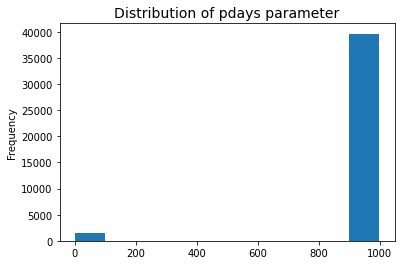

In [11]:
#plot pdays distribution
import matplotlib.pyplot as plt
df.pdays.plot(kind = 'hist')
plt.title('Distribution of pdays parameter', fontsize = 14);

Most of the feature values are equal to 999 and the rest of the values lie in quite a limited range. In this case we can transform this numeric value to a categorical one: 0 if value is equal to 999 and 1 if value is another.

In [12]:
#transform pdays to categorical and remove the numeric feature
df['pdays_categ'] = [0 if pday == 999 else 1 for pday in df.pdays]
df = df.drop(['pdays'], axis = 1)

Next step is to explore the dataframe for outliers and look at summary statistics. Also it could be helpful to have a look at distributions form.

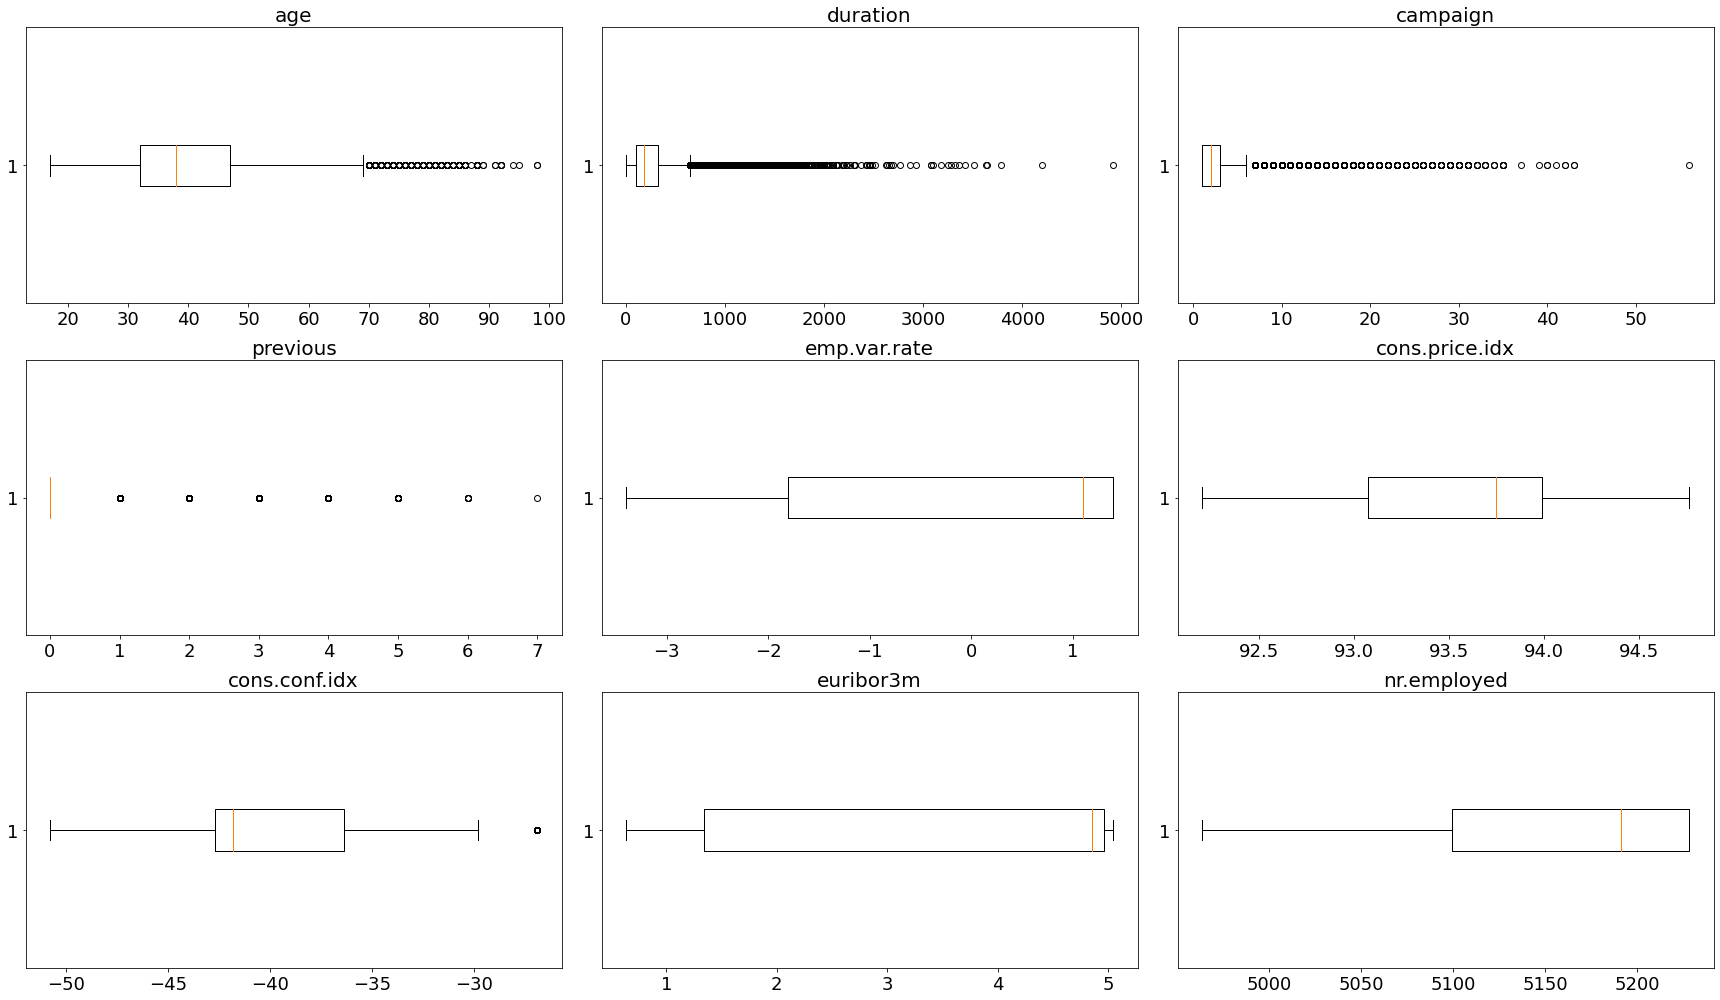

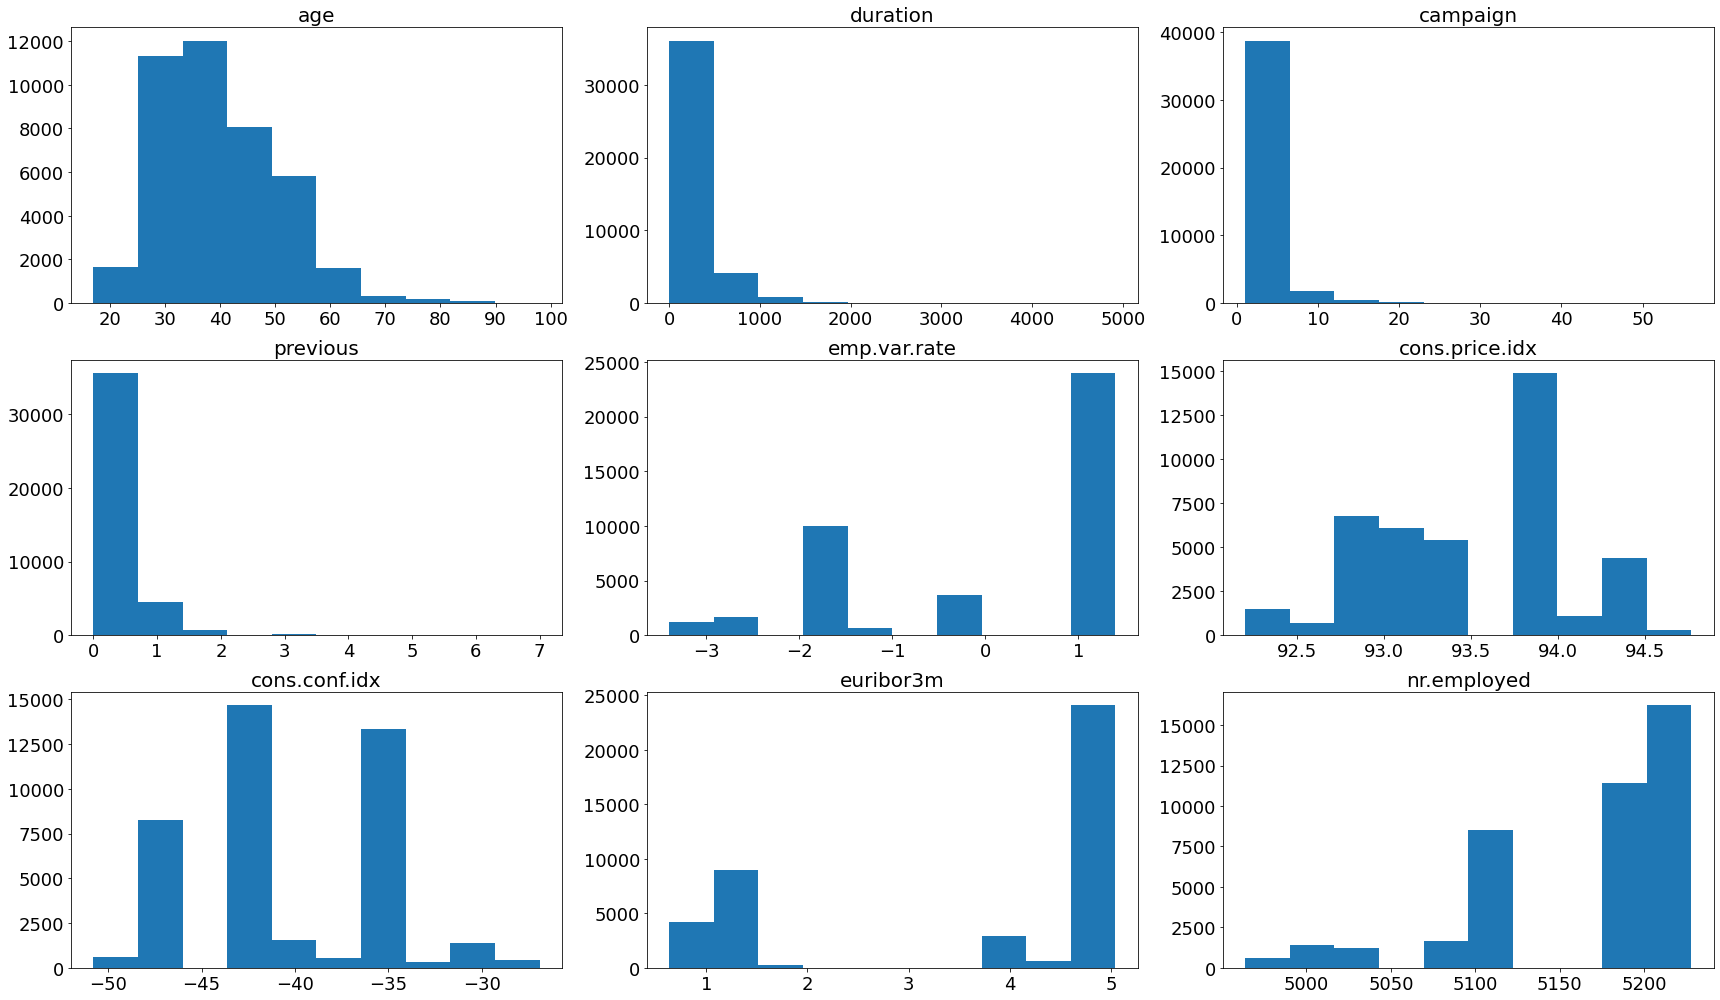

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,0.17,0.08,93.58,-40.50,3.62,5167.03
std,10.42,259.31,2.77,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [13]:
#Graphs for outlier detection
columns = list(df.select_dtypes(exclude=['object']).columns)
columns.remove('pdays_categ')

#create list of df columns 
cols_df = [df[i] for i in columns]

import matplotlib.pyplot as plt

#draw boxplot or whisker plot
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(24, 14)
for i, ax, title in zip(cols_df,axs.reshape(-1), columns):
    bp = ax.boxplot(i, vert = 0)
    ax.set_title(title, fontsize = 20)
    ax.tick_params(axis='both', labelsize=18)
fig.tight_layout()
plt.show()

#draw histogram to show distribution
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(24, 14)
for i, ax, title in zip(cols_df,axs.reshape(-1), columns):
    bp = ax.hist(i)
    ax.set_title(title, fontsize = 20)
    ax.tick_params(axis='both', labelsize=18)
fig.tight_layout()
plt.show()

#show summary statistics
round(df[columns].describe(),2)

We can see that several numeric variables have outliers. We can either keep or remove them. Usually outliers cannot be removed without analyzing. 
We keep the outliers in age variable cause removing the oldest clients will affect the customer base understanding.
We keep outliers in duration, campaign and previous cause they are just technical parameters and these outliers aren’t related to specific customer groups.
Also we keep an outlier in consumer confidence index also for a reason that removing a customer with a higher confidence index will not display diversity of the customers.            

Moreover, we can see that when plotting corresponding numeric variable and y variable, there’s no outliers that lie very far. We can see it at plots below.

As for features distributions, each distribution is quite far from a bell shape the normal distribution has. We could transform some of them to normal by applying log function. However, it becomes harder to interpret the results, so we decided to keep the variables distributions in initial condition.

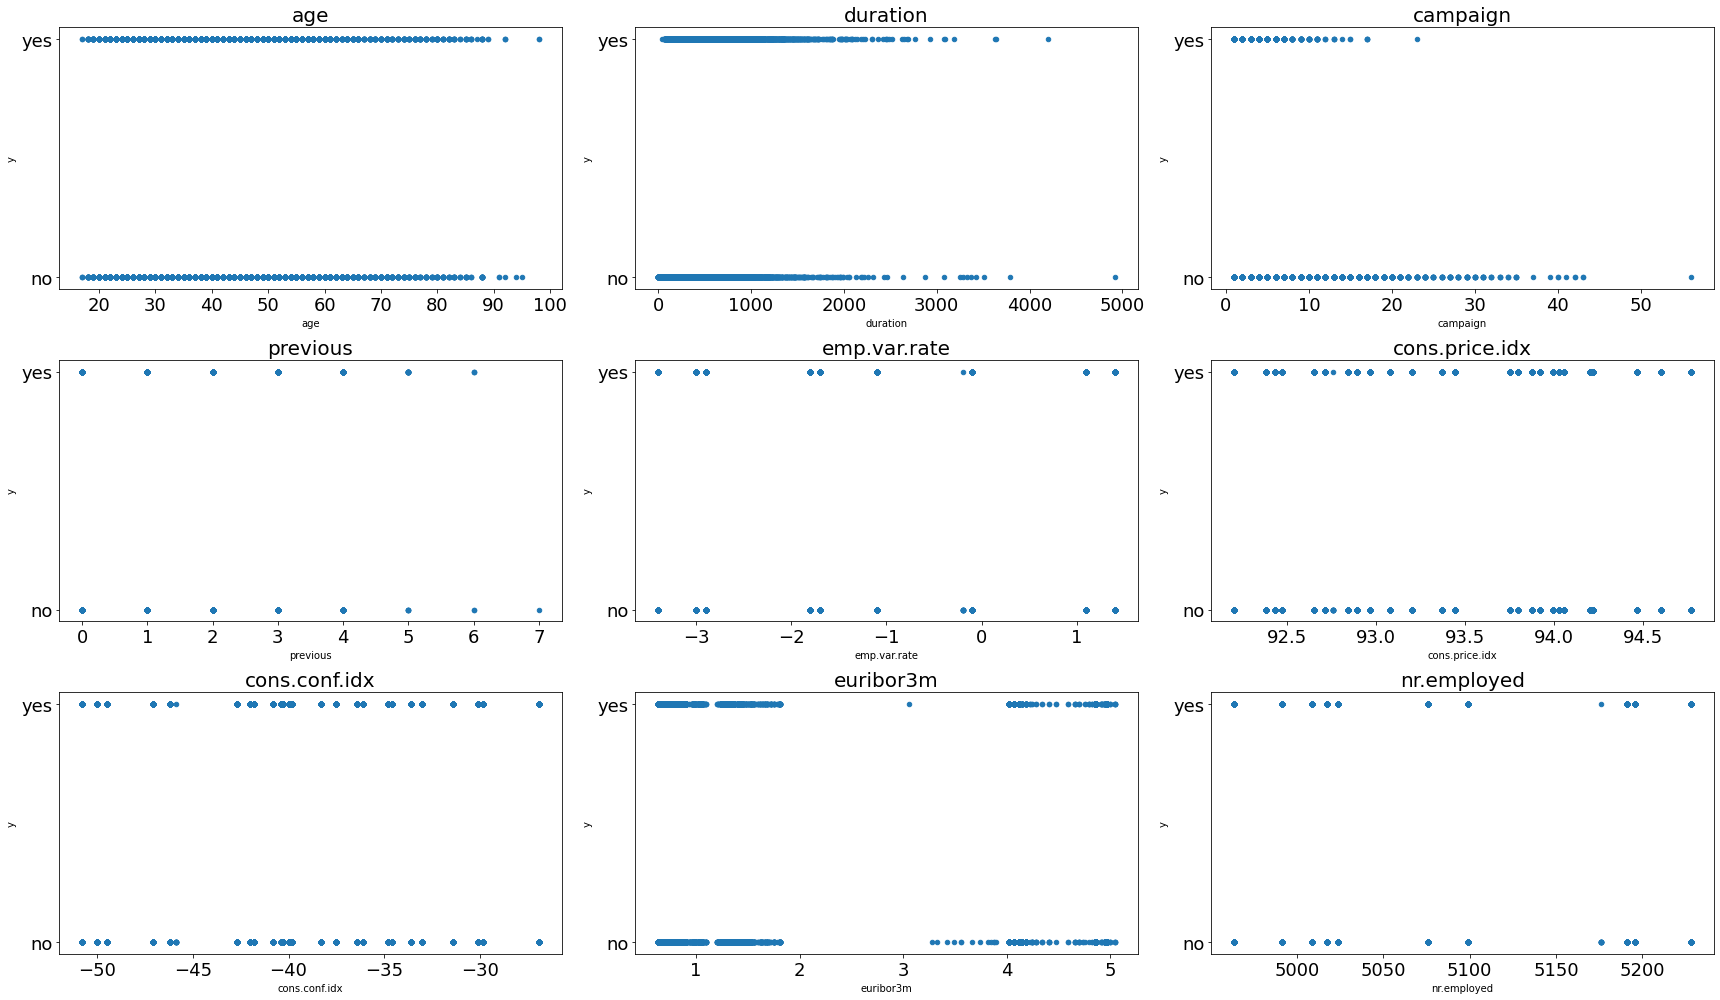

In [34]:
#plot the input variables in relation to the output variable
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(24, 14)
for i, ax, title in zip(columns,axs.reshape(-1), columns):
    bp = df.plot.scatter(i, 'y', ax = ax)
    ax.set_title(title, fontsize = 20)
    ax.tick_params(axis='both', labelsize=18)
fig.tight_layout()
plt.show()


In general, quantile method for detecting and removing outliers can be used. We provide the algorithm just for illustration. We can see that if we apply outliers removing to each numeric feature, we lost essential amount of data.

In [14]:
import numpy as np 
#read the dataframe and drop duplicates again
df_with_outlier = pd.read_csv('bank-additional-full.csv', delimiter = ';')
df_with_outlier = df_with_outlier.drop_duplicates()
print(f'Initial number of rows - {df_with_outlier.shape[0]}')

#define a function that removes outliers
def remove_outliers(column):
    global df_with_outlier 
    #define 1st and 3d quantile - 25% and 75%
    Q1 = np.percentile(df_with_outlier[column], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df_with_outlier[column], 75,
                   interpolation = 'midpoint')
    #define interquantile distance               
    IQR = Q3 - Q1
    #calculate lower and upper bounds
    upper = Q3+1.5*IQR
    lower = Q3-1.5*IQR
    #filter the dataframe using the calculated bounds
    df_with_outlier = df_with_outlier[df_with_outlier[column].between(lower, upper)]

#apply the function to each numeric column
for i in columns:   #columns = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
  remove_outliers(i)

print(f'Number of rows after removing outliers using quantiles - {df_with_outlier.shape[0]}')

Initial number of rows - 41176
Number of rows after removing outliers using quantiles - 20130
